<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/cvs_cost_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [20]:
path = '/gdrive/My Drive/'

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [22]:
df = pd.read_csv(path + 'data_cvs_resp.csv')

In [23]:
df.drop(['Unnamed: 0'], axis = 1, inplace= True)

In [24]:
from collections import Counter

In [25]:
target = df.values[:,-1]

In [26]:
print(df.shape)

(1167202, 9)


In [27]:
counter = Counter(target)
for k,v in counter.items():
  per = v/len(target)*100
  print('Class =%s,Count =%d, Percentage=%3f%%'%(k,v,per))

Class =0.0,Count =1144776, Percentage=98.078653%
Class =1.0,Count =22426, Percentage=1.921347%


In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HR,1167202.0,84.213367,13.138542,64.0,74.0,84.00,94.00,106.0
O2Sat,1167202.0,97.529540,1.965434,94.0,96.0,98.00,99.00,100.0
SBP,1167202.0,121.730389,16.610081,97.5,109.0,120.00,134.00,151.0
MAP,1167202.0,79.948555,10.731372,64.0,71.0,79.00,88.50,97.0
DBP,1167202.0,61.454623,6.991990,50.0,58.0,61.00,64.50,74.0
Resp,1167202.0,18.451131,3.638062,13.0,16.0,18.00,21.00,25.0
Age,1167202.0,62.333790,16.280111,14.0,52.0,64.08,74.96,100.0
Gender,1167202.0,0.566141,0.495606,0.0,0.0,1.00,1.00,1.0
SepsisLabel,1167202.0,0.019213,0.137275,0.0,0.0,0.00,0.00,1.0


In [29]:
df.columns = map(str.lower, df.columns)
df.columns

Index(['hr', 'o2sat', 'sbp', 'map', 'dbp', 'resp', 'age', 'gender',
       'sepsislabel'],
      dtype='object')

In [30]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 10.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

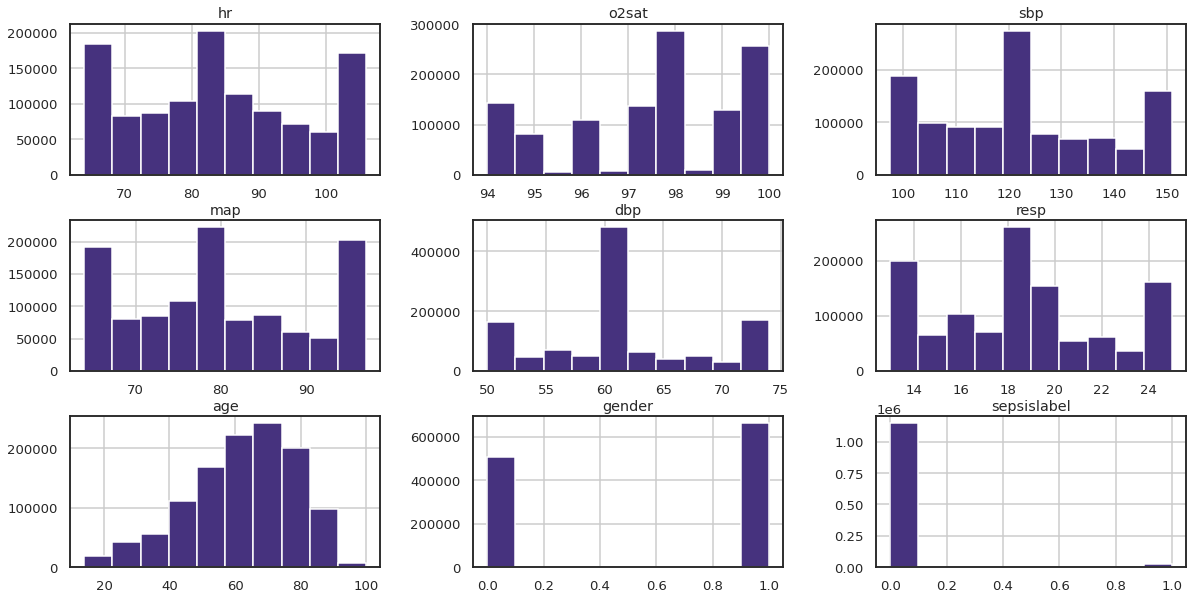

In [31]:
df.hist()
plt.show()

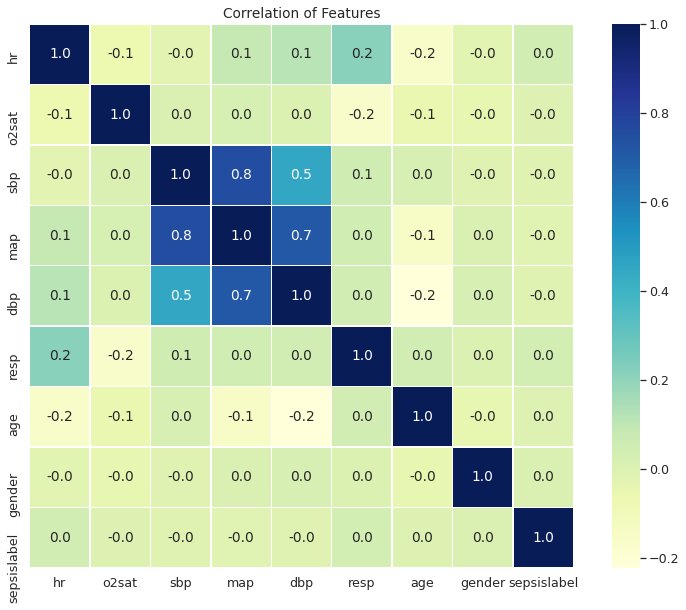

In [32]:
sns.set(font_scale = 1.15)
plt.figure(figsize = (14, 10))

sns.heatmap(df.corr(), vmax = 1, linewidths = 0.5, fmt= '.1f',
            square = True, annot = True, cmap = 'YlGnBu', linecolor = "white")
plt.title('Correlation of Features');

In [33]:
y = df.sepsislabel.values
x = df.drop(["sepsislabel"], axis = 1)

x = (x - np.min(x))/(np.max(x)-np.min(x)).values

In [34]:
# Train & Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

features = x_train.T
labels = y_train.T
test_features = x_test.T
test_labels = y_test.T

print("features: ", features.shape)
print("labels: ", labels.shape)
print("test_features: ", test_features.shape)
print("test_labels: ", test_labels.shape)

features:  (8, 933761)
labels:  (933761,)
test_features:  (8, 233441)
test_labels:  (233441,)


In [35]:
#Parameter Initialize 
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1),0.01)
    b= 0.0
    return w,b

In [36]:
# Sigmoid Function**
# Sigmoid Function Formula; 1/(1+e^-x)
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [37]:
# Forward & Backward Propagation
def foward_and_backward_propagation(w, b, x_train, y_train):
    #Forward Propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]          #x_train.shape[1] is for scaling
    
    # Backward Propagation
    derivative_weight = (np.dot(x_train, ((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost, gradients

In [38]:
#Updating Parameters
def update(w, b, x_train, y_train, learning_rate, number_of_iterations):
    cost_list = []
    cost_list2 = []
    index = []
    
    # Updating (learning) parameters is number_of_iterations times
    for i in range(number_of_iterations):
        
        cost, gradients = foward_and_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        #Let's update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iterations %i: %f" %(i, cost))
            
    # We update (learn) parameters weights and bias
    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.title("Cost-Iteration Relation")
    plt.xticks(index, rotation = "vertical")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [39]:
#Prediction
def predict(w, b, x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T, x_test)+b)
    y_prediction = np.zeros((1, x_test.shape[1]))
    #
    #
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
            
    return y_prediction

Cost after iterations 0: 0.712891
Cost after iterations 10: 0.103250
Cost after iterations 20: 0.100796
Cost after iterations 30: 0.100226
Cost after iterations 40: 0.099891
Cost after iterations 50: 0.099610
Cost after iterations 60: 0.099352
Cost after iterations 70: 0.099112
Cost after iterations 80: 0.098887
Cost after iterations 90: 0.098676
Cost after iterations 100: 0.098478
Cost after iterations 110: 0.098292
Cost after iterations 120: 0.098117
Cost after iterations 130: 0.097951
Cost after iterations 140: 0.097795
Cost after iterations 150: 0.097647
Cost after iterations 160: 0.097507
Cost after iterations 170: 0.097374
Cost after iterations 180: 0.097248
Cost after iterations 190: 0.097129
Cost after iterations 200: 0.097015
Cost after iterations 210: 0.096906
Cost after iterations 220: 0.096803
Cost after iterations 230: 0.096704
Cost after iterations 240: 0.096610
Cost after iterations 250: 0.096520
Cost after iterations 260: 0.096434
Cost after iterations 270: 0.096351
Cos

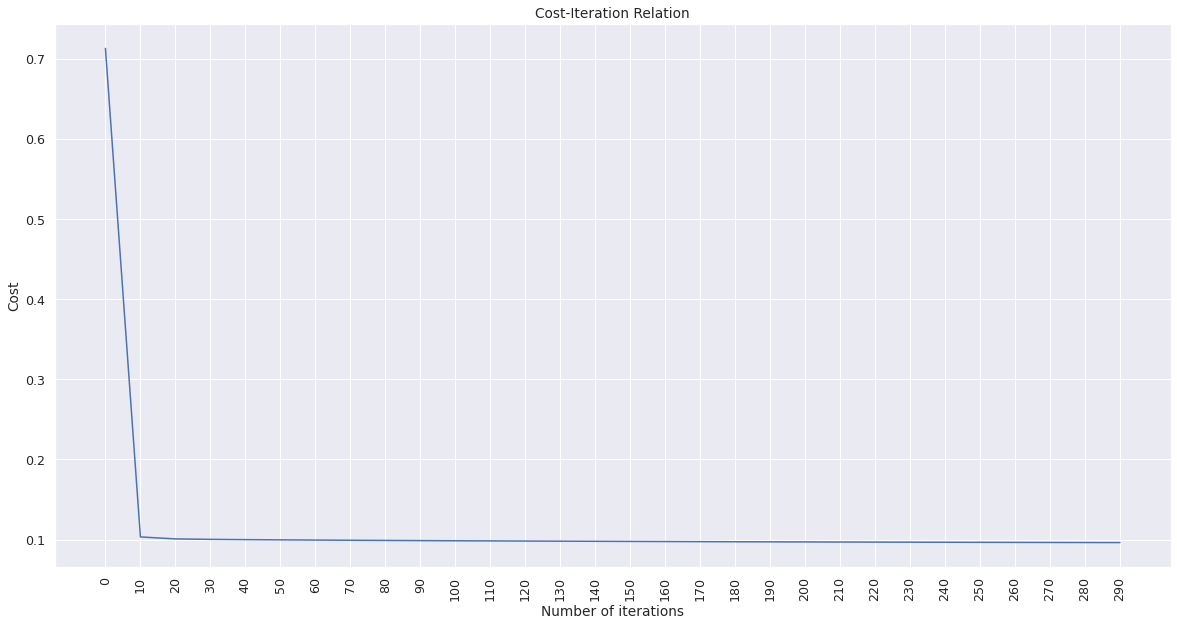

test accuracy: 98.0890246357752 %


In [40]:
# Logistic Regression
def logistic_regression(features, labels, test_features, test_labels, learning_rate ,  num_iterations):
    # Initialize
    dimension =  features.shape[0]  # It is 8
    w,b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list = update(w, b, features, labels, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],test_features)
    # Print test errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - test_labels)) * 100))
    
logistic_regression(features, labels, test_features, test_labels,learning_rate = 1.5, num_iterations = 300)   

In [41]:
# Logistic Regression with Scikit-Learn
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(features.T, labels.T).score(test_features.T, test_labels.T)))

test accuracy: 0.980890246357752 


In [42]:
labels = labels.reshape(labels.shape[0], -1).T
test_labels = test_labels.reshape(test_labels.shape[0], -1).T

print(labels.shape)
print(test_labels.shape)

(1, 933761)
(1, 233441)


In [43]:
class Artificial_Neural_Network(object):
    
    def __init__(self, xTrain, xTest, yTrain, yTest):
        # Define train and test data
        self.xTrain = xTrain
        self.xTest = xTest
        self.yTrain = yTrain.reshape(yTrain.shape[0],-1)
        self.yTest = yTest.reshape(yTest.shape[0],-1)

        # Define hyperparameters
        self.inputLayerSize = self.xTrain.shape[0] # nx <-> Number of samples
        self.hiddenLayerSize = 4
        self.outputLayerSize = self.yTrain.shape[0]
        
    def initializeWeightsAndBias(self): #, inputLayerSize, hiddenLayerSize, outputLayerSize):
        """
        This function creates a vector of zeros of shape (inputLayerSize, 1) for w and initializes b to 0.

        Argument:
        inputLayerSize -- size of the input layer
        hiddenLayerSize -- size of the hidden layer
        outputLayerSize -- size of the output layer

        Returns:
        params -- python dictionary containing your parameters:
                        W1 -- weight matrix of shape (hiddenLayerSize, inputLayerSize)
                        b1 -- bias vector of shape (hiddenLayerSize, 1)
                        W2 -- weight matrix of shape (outputLayerSize, hiddenLayerSize)
                        b2 -- bias vector of shape (outputLayerSize, 1)
        """
        np.random.seed(23) # We set up a seed so that your output matches ours 
                           # although the initialization is random.
        
        W1 = np.random.randn(self.inputLayerSize, 
                             self.hiddenLayerSize) * 0.01
        b1 = np.zeros(shape=(self.hiddenLayerSize, 1))
        W2 = np.random.randn(self.hiddenLayerSize,
                             self.outputLayerSize) * 0.01
        b2 = np.zeros(shape=(self.outputLayerSize, 1))
        
        # assert(isinstance(B1, float) or isinstance(B1, int))
        
        assert (W1.shape == (self.inputLayerSize, self.hiddenLayerSize)), "[W1] -> Unsuitable matrix size"
        assert (b1.shape == (self.hiddenLayerSize, 1))
        assert (W2.shape == (self.hiddenLayerSize, self.outputLayerSize)), "[W2] -> Unsuitable matrix size"
        assert (b2.shape == (self.outputLayerSize, 1))
        
        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2}   
        
        return parameters
    
    def sigmoid(self, Z):
        """ Apply and compute sigmoid activation function to scalar, vector, or matrix (Z)

        Arguments:
        Z -- A scalar or numpy array of any size.

        Return:
        s -- sigmoid(z)
        """
        return 1/(1+np.exp(-Z))
    
    def forwardPropagation(self, X, parameters):
        """ Propogate inputs though network
        
        Argument:
        X -- input data of size (inputLayerSize, m)
        parameters -- python dictionary containing your parameters (output of initialization function)

        Returns:
        A2 -- The sigmoid output of the second activation
        cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
        """
        # Retrieve each parameter from the dictionary "parameters"
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']

        # Implement Forward Propagation to calculate A2 (probabilities)
        Z1 = np.dot(W1.T, X) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2.T, A1) + b2
        yHat = self.sigmoid(Z2) # A2
        
        assert(yHat.shape == (1, X.shape[1]))
    
        cache = {"Z1": Z1,
                 "A1": A1,
                 "Z2": Z2,
                 "yHat": yHat}    # A2
    
        return yHat, cache
    
    def computeCost(self, yHat, Y, parameters):
        """ Compute cost for given X,Y, use weights already stored in class 

        Arguments:
        yHat -- The sigmoid output of the second activation, of shape (1, number of examples)
        Y -- "true" labels vector of shape (1, number of examples)
        parameters -- python dictionary containing your parameters W1, b1, W2 and b2

        Returns:
        cost -- cross-entropy cost given equation (13)
        """
        m = Y.shape[1] # number of example
                      
        # Retrieve W1 and W2 from parameters
        W1 = parameters['W1']
        W2 = parameters['W2']   
                    
        # Loss
        logprobs = np.multiply(np.log(yHat), Y) + np.multiply((1 - Y), np.log(1 - yHat))
        # Cost
        cost = - (np.sum(logprobs)) / m     # m =  yTrain.shape[1]  is for scaling
        
        cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
        assert(isinstance(cost, float))
                      
        return cost

    def backwardPropagation(self,parameters, cache,  X, Y):
        """ Compute the gradients of parameters by implementing the backward propagation

        Arguments:
        parameters -- python dictionary containing our parameters 
        cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
        X -- input data of shape (2, number of examples)
        Y -- "true" labels vector of shape (1, number of examples)

        Returns:
        grads -- python dictionary containing your gradients with respect to different parameters
        """
        m = X.shape[1]   
                      
        # First, retrieve W1 and W2 from the dictionary "parameters".       
        W1 = parameters['W1']
        W2 = parameters['W2']
                      
        # Retrieve also A1 and A2 from dictionary "cache".
        A1 = cache['A1']
        yHat = cache['yHat']                    
                      
        # Backward propagation: calculate dW1, db1, dW2, db2.                     
        dZ2 = yHat - Y
        dW2 = (1 / m) * np.dot(A1, dZ2.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.multiply(np.dot(W2, dZ2), 1 - np.power(A1, 2))
        dW1 = (1 / m) * np.dot(X, dZ1.T)#(1 / m) * np.dot(dZ1, self.xTrain.T) # MATRIS BOYUTLARINA BAK dW1 ve dW2 ICIN
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)   # m is for scaling 

        gradients = {"dW1": dW1,
                     "db1": db1,
                     "dW2": dW2,
                     "db2": db2}
                      
        return gradients
    
    def updateParameters(self, parameters, gradients, learning_rate = 0.15):
        """
        Updates parameters using the gradient descent update rule given above

        Arguments:
        parameters -- python dictionary containing your parameters 
        grads -- python dictionary containing your gradients 

        Returns:
        parameters -- python dictionary containing your updated parameters 
        """
        # Retrieve each parameter from the dictionary "parameters"
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']

        # Retrieve each gradient from the dictionary "grads"
        dW1 = gradients['dW1']
        db1 = gradients['db1']
        dW2 = gradients['dW2']
        db2 = gradients['db2']
        
        # Update rule for each parameter
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2

        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2}

        return parameters
                      
    def model(self, X, Y, num_iterations=10000, print_cost=False):
        """
        Arguments:
        X -- dataset of shape (2, number of examples)
        Y -- labels of shape (1, number of examples)
        n_h -- size of the hidden layer
        num_iterations -- Number of iterations in gradient descent loop
        print_cost -- if True, print the cost every 1000 iterations

        Returns:
        parameters -- parameters learnt by the model. They can then be used to predict.
        """
        np.random.seed(3)
        
        costStr = []
        indexStr = []
        
        # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
        parameters = self.initializeWeightsAndBias()

        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']
 
        # Loop (gradient descent)
        for i in range(0, num_iterations):
                      
            # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
            yHat, cache = self.forwardPropagation(X, parameters)

            # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
            cost = self.computeCost(yHat, Y, parameters)
            
            # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
            gradients = self.backwardPropagation(parameters, cache, X, Y)

            # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
            parameters = self.updateParameters(parameters, gradients, learning_rate = 0.0001)

            # Print the cost every 1000 iterations
            if print_cost and i % 1000 == 0:
                costStr.append(cost)
                indexStr.append(i)
                print ("Cost after iteration %i: %f" % (i, cost))
            
        # Plot Cost Function
        plt.plot(indexStr,costStr)
        plt.xticks(indexStr,rotation='vertical')
        plt.xlabel("Number of Iterarion")
        plt.ylabel("Cost")
        plt.show()
            
        return parameters

    def predict(self, parameters, X):
        """
        Using the learned parameters, predicts a class for each example in X

        Arguments:
        parameters -- python dictionary containing your parameters 
        X -- input data of size (n_x, m)

        Returns
        predictions -- vector of predictions of our model (red: 0 / blue: 1)
        """
        # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
        yHat, cache = self.forwardPropagation(X, parameters)
        predictions = np.round(yHat)

        
        return predictions

Cost after iteration 0: 0.696697
Cost after iteration 1000: 0.652353
Cost after iteration 2000: 0.612142
Cost after iteration 3000: 0.575592
Cost after iteration 4000: 0.542294
Cost after iteration 5000: 0.511897
Cost after iteration 6000: 0.484096
Cost after iteration 7000: 0.458625
Cost after iteration 8000: 0.435250
Cost after iteration 9000: 0.413766
Cost after iteration 10000: 0.393991
Cost after iteration 11000: 0.375764
Cost after iteration 12000: 0.358942
Cost after iteration 13000: 0.343398
Cost after iteration 14000: 0.329016
Cost after iteration 15000: 0.315695
Cost after iteration 16000: 0.303341
Cost after iteration 17000: 0.291872
Cost after iteration 18000: 0.281212
Cost after iteration 19000: 0.271294
Cost after iteration 20000: 0.262057
Cost after iteration 21000: 0.253444
Cost after iteration 22000: 0.245406
Cost after iteration 23000: 0.237896
Cost after iteration 24000: 0.230873


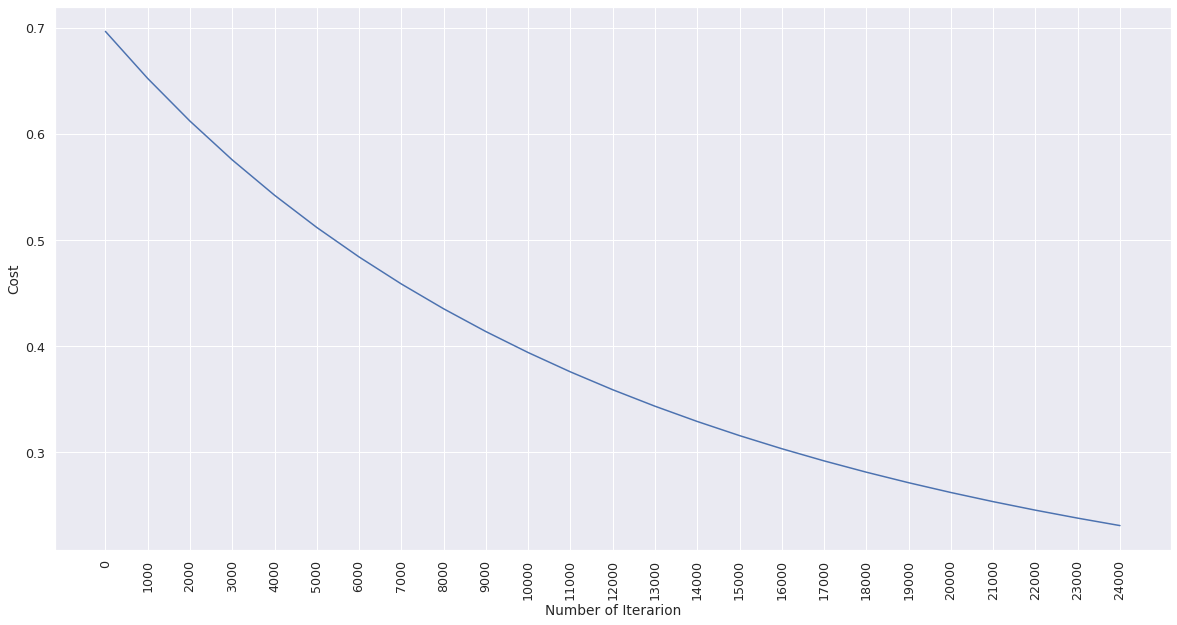

Train Accuracy: 98%


In [44]:
ANN = Artificial_Neural_Network(features, test_features, labels, test_labels)
parameters = ANN.model(features, labels, num_iterations = 25000, print_cost=True)
predictions = ANN.predict(parameters, features)
print('Train Accuracy: %d' % float((np.dot(labels, predictions.T) + np.dot(1 - labels, 1 - predictions.T)) / float(labels.size) * 100) + '%')